In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !unzip /content/drive/MyDrive/Hackathon/86cafcbcc7c011ed.zip -d /content/drive/MyDrive/Hackathon

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Hackathon/dataset/train.csv')
print("Number of missing values:\n", data.isnull().sum())

Number of missing values:
 id              0
var_1        2124
var_2        2124
var_3        2124
var_4        2124
            ...  
var_5475    23974
var_5476    24211
var_5477    24993
var_5478    22430
target          0
Length: 5480, dtype: int64


In [5]:
data.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478,target
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id_2,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150602,...,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id_3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,0.008333,NaN,NaN,0.0,NaN,NaN,0.0,0
3,id_4,0.156250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
data.shape

(25000, 5480)

In [7]:
data = data.drop(columns=['id'])

In [8]:
# Calculate the percentage of missing values in each column
missing_percentages = data.isnull().sum() / len(data) * 100

# Filter out the columns with less than 10% of missing values
cols_to_keep_null = missing_percentages[missing_percentages < 80].index

In [9]:
newData = data[cols_to_keep_null]

In [10]:
# Removing the columns where infinte value is greater than 80
# Calculate the percentage of missing values in each column
missing_percentages = np.isinf(newData).sum() / len(data) * 100

# Filter out the columns with less than 10% of missing values
cols_to_keep_inf = missing_percentages[missing_percentages < 80].index

In [11]:
newData = newData[cols_to_keep_inf]

In [12]:
newData.shape

(25000, 3618)

In [13]:
newData.replace([np.inf, -np.inf], -1, inplace=True)

In [14]:
newData.fillna(value=-2, inplace=True)

In [ ]:
# sns.heatmap(newData.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

In [15]:
max_values = newData.max()
min_values = newData.min()
diff = newData.max() - newData.min()

In [16]:
# print(max_values.max())

In [17]:
inf_locations = np.isinf(newData)

# # print the result
print(inf_locations.sum())

var_1       0
var_2       0
var_3       0
var_4       0
var_5       0
           ..
var_5463    0
var_5464    0
var_5466    0
var_5472    0
target      0
Length: 3618, dtype: int64


In [ ]:
# sns.heatmap(data.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

In [18]:
df = newData

In [ ]:
df.info

<bound method DataFrame.info of           var_1  var_2  var_3  var_4  var_5  var_6  var_7  var_8     var_9  \
0      0.015625    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.355422   
1      0.187500    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.150602   
2      0.000000    0.0    0.0    0.0    0.0    0.0    0.0    0.0 -2.000000   
3      0.156250    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.018072   
4      0.046875    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.096386   
...         ...    ...    ...    ...    ...    ...    ...    ...       ...   
24995  0.078125    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.018072   
24996  0.078125    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.012048   
24997  0.046875    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.036145   
24998  0.125000    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.030120   
24999  0.031250    0.0    0.0    0.0    0.0    0.0    0.0    0.0  0.180723   

         var_10  ...  var_5457 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 3618 entries, var_1 to target
dtypes: float64(3617), int64(1)
memory usage: 690.1 MB


In [ ]:
#Manu
# df.isnull().sum()

# df['var_5477'].fillna((df['var_5477'].mean()), inplace=True)

In [19]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.00001, random_state=52)

In [39]:
X_train.shape

(24999, 3617)

In [40]:
input_shape_row , input_shape_col = X_train.shape

In [41]:
# Create a scaler object and fit it to the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler object
X_test = scaler.transform(X_test)

In [42]:
# # Convert the input data to float32 data type
# X_train = np.asarray(X_train).astype('float32')
# X_test = np.asarray(X_test).astype('float32')
# y_train = np.asarray(y_train).astype('float32')
# y_test = np.asarray(y_test).astype('float32')

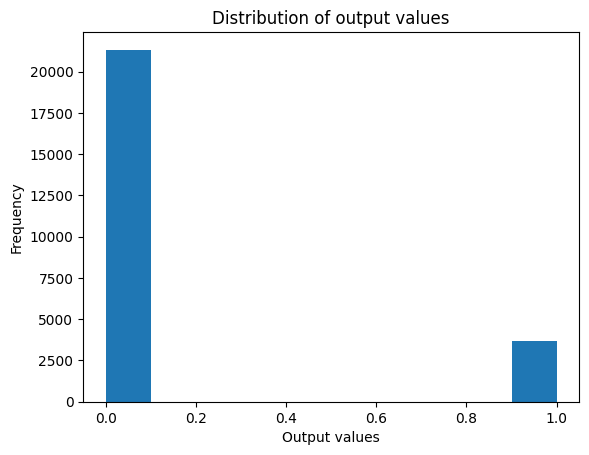

In [43]:
import matplotlib.pyplot as plt
plt.hist(y_train)
plt.xlabel('Output values')
plt.ylabel('Frequency')
plt.title('Distribution of output values')
plt.show()

In [44]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from sklearn.metrics import f1_score, accuracy_score

In [45]:
# from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier with balanced subsample
# rf = RandomForestClassifier(n_estimators=1000, max_depth=100, class_weight='balanced_subsample')

# Fit the model on training data
# rf.fit(X_train, y_train)



In [46]:
# Make predictions on test data
# y_pred = rf.predict(X_test)
# Make probability predictions on test data
# y_proba = rf.predict_proba(X_test)

# Print probability predictions for first 10 instances
# print("Probability Predictions:\n", y_proba[:10])

In [47]:
# Calculate accuracy score
# accuracy = accuracy_score(y_test, y_pred)

# Print accuracy score
# print("Accuracy: {:.2f}%".format(accuracy * 100))

In [48]:
batch_size = 32
optimizer = 'Adam'
epochs= 500

In [49]:
# Define the F1 metric
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
# f1 = 2 * ((precision*recall) / (precision + recall + tf.keras.backend.epsilon()))


In [50]:
# Build the model
def build_model():
  model = keras.Sequential([
      keras.layers.Dense(8192, activation='relu', input_shape=(input_shape_col,)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(4096, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(2048, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(1024, activation='tanh'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(512, activation='relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(256, activation='tanh'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(128, activation='tanh'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(64, activation='tanh'),
      keras.layers.Dropout(0.1),
      keras.layers.Dense(1,activation='sigmoid')
  ])

  model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[precision , recall , 'accuracy'])
  
  return model

In [51]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='loss', patience=3)

In [52]:
# Train the model with the EarlyStopping callback

model = build_model()

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
          validation_data=(X_test, y_test))
  


Epoch 1/500
782/782 [==============================] - 19s 19ms/step - loss: 0.4343 - precision_1: 0.1765 - recall_1: 8.1722e-04 - accuracy: 0.8527 - val_loss: 0.1859 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/500
782/782 [==============================] - 15s 19ms/step - loss: 0.4279 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - accuracy: 0.8531 - val_loss: 0.1787 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/500
782/782 [==============================] - 15s 19ms/step - loss: 0.4239 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - accuracy: 0.8532 - val_loss: 0.1692 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/500
782/782 [==============================] - 15s 19ms/step - loss: 0.4215 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - accuracy: 0.8532 - val_loss: 0.1646 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
# # Evaluate the model
# test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# # print('\nTest accuracy:', test_acc)

In [ ]:
# from sklearn.metrics import accuracy_score
# y_pred = clf_entropy.predict(X_test)

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [53]:
# Prediction from the file
test_data = pd.read_csv("/content/drive/MyDrive/Hackathon/dataset/test.csv")

# test_data = pd.read_csv("test.csv")

In [54]:
test_data.head()

,id,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_5469,var_5470,var_5471,var_5472,var_5473,var_5474,var_5475,var_5476,var_5477,var_5478
0,id_1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,0.035714,NaN,0.0125,NaN,NaN,NaN,NaN,NaN,NaN
1,id_2,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_3,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_5,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
cols_to_keep_null_test = cols_to_keep_null[:-1]
cols_to_keep_inf_test = cols_to_keep_inf[:-1]

In [56]:
tdf = test_data[cols_to_keep_null_test]
tdf = tdf[cols_to_keep_inf_test]

In [57]:
tdf.fillna(value=-2, inplace=True)
tdf.replace([np.inf, -np.inf], -1, inplace=True)

# print(tdf.isnull().sum())

In [58]:
tdf.shape

(5000, 3617)

In [ ]:
tdf.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_5456,var_5457,var_5458,var_5460,var_5461,var_5462,var_5463,var_5464,var_5466,var_5472
0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.128426,...,0.059524,0.036810,0.068376,0.079254,0.052632,0.046980,0.049020,0.084211,0.070866,0.0125
1,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018072,0.111644,...,0.041667,0.055215,-2.000000,0.069930,0.105263,0.026846,0.029412,-2.000000,0.044619,-2.0000
2,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012048,0.106633,...,0.017857,0.049080,0.000000,0.037296,-2.000000,0.000000,0.029412,-2.000000,0.010499,-2.0000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.000000,-2.000000,...,0.029762,-2.000000,-2.000000,0.020979,0.026316,0.020134,-2.000000,-2.000000,0.015748,-2.0000
4,0.046875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.000000,0.106633,...,0.011905,0.006135,-2.000000,0.011655,-2.000000,-2.000000,0.000000,-2.000000,0.000000,-2.0000


In [ ]:
# y_predict = model.predict(tdf)

In [61]:
tdf = scaler.transform(tdf)

In [62]:
max_values = tdf.max()
min_values = tdf.min()
diff = tdf.max() - tdf.min()

In [63]:
print(max_values.max())

4741.592145566883


In [ ]:

# Make predictions on test data
y_pred = rf.predict(tdf)
# Make probability predictions on test data
y_proba = rf.predict_proba(tdf)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [64]:
y_predict = model.predict(tdf)

157/157 [==============================] - 1s 6ms/step


In [67]:
y_predict

array([[0.14816715],
       [0.14816715],
       [0.14816715],
       ...,
       [0.14816715],
       [0.14816715],
       [0.14816715]], dtype=float32)

In [66]:
output = []
for i in range(len(y_predict)):
  if(y_predict[i] > 0.5):
    output.append(1)
  else:
    output.append(0)

In [71]:
pred = []
for i in range(len(y_predict)):
  val = y_predict[i]
  pred.append(val)

In [ ]:
# for i in range(len(y_predict)):
#   if(y_predict[i] > 0.5):
#     y_predict[i] = 1
#   else:
#     y_predict[i] = 0

In [72]:
output_df = pd.DataFrame({'id': test_data['id'], 'predicted': output, 'predicted_probability': pred})


In [ ]:
# Create dataframe with predicted class and predicted probabilities
output_df = pd.DataFrame({'id': test_data['id'], 'predicted': y_pred, 'predicted_probability': y_proba[:, 1]})

# Print first 10 rows of output dataframe
print(output_df.head(10))

      id  predicted  predicted_probability
0   id_1          0                  0.124
1   id_2          0                  0.132
2   id_3          0                  0.141
3   id_4          0                  0.136
4   id_5          0                  0.132
5   id_6          0                  0.129
6   id_7          0                  0.140
7   id_8          0                  0.131
8   id_9          0                  0.129
9  id_10          0                  0.136


In [73]:
output_df.to_csv('/content/drive/MyDrive/Hackathon/test_output_2.csv',index=False)

In [ ]:
# print(y_predict)


In [ ]:
# type(y_predict)

In [ ]:
  # count = 0
  # for i in range(len(y_predict)):
  #   if(y_predict[i] == np.NaN):
  #     count+=1

  # print(count)

In [ ]:
# for i in range(len(y_predict)):
#   if(y_predict[i] > 0.5):
#     y_predict[i] = 1
#   else:
#     y_predict[i] = 0

In [ ]:
# ones = 0
# zeros = 0

# for i in range(len(y_predict)):
#   if(y_predict[i]==1):
#     ones+=1
#   else:
#     zeros+=1
    

In [ ]:
# print(ones)
# print(zeros)